In [1]:
import sys
sys.path.append('../')
from Code.NewNeurons2 import LIFNeuron
from Code.Networks2 import ParallelNetwork, OuterWrapper, SequenceWrapper
import torch
from torch.distributions.normal import Normal
import matplotlib.pyplot as plt

In [2]:
BATCH_SIZE = 128#1024
LENGTH = 1000
device = torch.device('cpu')

In [3]:
def do_test(beta, var, factor):
    normal = Normal(0,var)
    base_config = {
        'BETA': beta,
        'SPIKE_FN': 'ss',
        '1-beta': False
    }

    arch = {
        'input': 1,
        'output': [['input'], LIFNeuron(1, base_config), None]
    }

    model = OuterWrapper(SequenceWrapper(ParallelNetwork(arch, bias=False)), device)

    x = normal.sample((LENGTH, BATCH_SIZE, 1)) * factor

    out, _, log = model(x, logging=True)

    return log['output'].mean().item()

In [24]:
res = []
adap = []
fac = []
stdd = 0.5#0.11**(0.5)#0.33 #0.4
for i in range(21):
    beta = i*0.05
    factor = ((1-beta**2))**(0.5)
    res.append(do_test(beta, stdd, 1))
    adap.append(res[-1]* factor)
    fac.append(do_test(beta, stdd, factor))


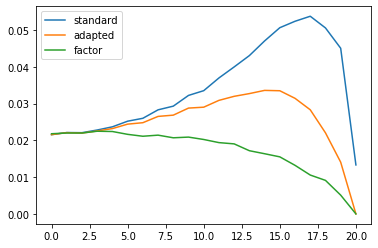

In [25]:
plt.plot(range(21), res, label='standard')
plt.plot(range(21), adap, label='adapted')
plt.plot(range(21), fac, label='factor')
plt.legend()

In [6]:
Normal(0,0.5).sample([10000]).var()

tensor(0.2454)

In [7]:
(1/6)**(1/2)

0.408248290463863

In [8]:
top1 = torch.load('../models/top1_2')

/opt/conda/lib/python3.6/site-packages/torch/serialization.py:563: SourceChangeWarning: source code of class 'Code.NewNeurons2.LIFNeuron' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/opt/conda/lib/python3.6/site-packages/torch/serialization.py:563: SourceChangeWarning: source code of class 'Code.NewNeurons2.AdaptiveNeuron' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)


In [9]:
top1.layers.loop.model.layers.control_synapse.weight.var()

tensor(1.0506, device='cuda:0', grad_fn=<VarBackward0>)

In [10]:
top1.layers.loop.model.layers.mem_synapse.weight.var()


tensor(1.2483, device='cuda:0', grad_fn=<VarBackward0>)

In [11]:
top1.layers.loop.model.layers.control_synapse.weight.max()

tensor(5.3135, device='cuda:0', grad_fn=<MaxBackward1>)

In [22]:

res = []
fac = []
stdd = 0.11**(0.5)#0.33 #0.4
for i in range(21):
    beta = 0.9#i*0.05
    factor = ((1-beta**2))**(0.5)
    stdd = i*0.05
    res.append(do_test(beta, stdd, 1))
    fac.append(do_test(beta, stdd, factor))


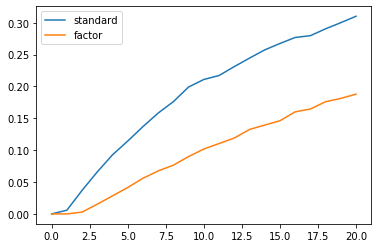

In [17]:
plt.plot(range(21), res, label='standard')
plt.plot(range(21), fac, label='factor')
plt.legend()

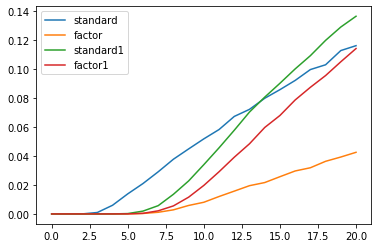

In [23]:
plt.plot(range(21), res, label='standard')
plt.plot(range(21), fac, label='factor')
plt.plot(range(21), res1, label='standard1')
plt.plot(range(21), fac1, label='factor1')
plt.legend()

In [21]:
res1 = res
fac1 = fac